Lets Plot

In [6]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, plot, io
import os
from czifile import imread
import skimage as sk
import pandas as pd


In [7]:
# Define the folder location
folderLoc = os.path.join(os.path.dirname(os.getcwd()), r'Raw_Datasets\Super_Res\2023-06-21')


# Initialize the main dictionary
imageDict = {}
imageDict['Control'] = {}
imageDict['GSK'] = {}

# Get the names of all directories in folderLoc
timepointDirs = [name for name in os.listdir(folderLoc) if os.path.isdir(os.path.join(folderLoc, name)) and name.startswith('TIMEPOINT')]

# Iterate over each timepoint directory
for timepointDir in timepointDirs:
    # Initialize the nested dictionary for each timepoint
    imageDict['Control'][timepointDir] = {}
    imageDict['GSK'][timepointDir] = {}
    
    # Get the paths to each .czi file that begins with C or G
    cziFiles = [os.path.join(folderLoc, timepointDir, file) for file in os.listdir(os.path.join(folderLoc, timepointDir)) if file.startswith(('C', 'G')) and file.endswith('.czi')]

    # Add the paths to the nested dictionary
    for cziFile in cziFiles:
        mainKey = 'Control' if os.path.basename(cziFile).startswith('C') else 'GSK'
        imageDict[mainKey][timepointDir][os.path.basename(cziFile)] = cziFile
    

# Print the resulting dictionary
print(imageDict)


{'Control': {'TIMEPOINT 1 T 0 MIN': {'C1_T1.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 1 T 0 MIN\\C1_T1.czi', 'C2_T1.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 1 T 0 MIN\\C2_T1.czi', 'C3_T1.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 1 T 0 MIN\\C3_T1.czi', 'C4_T1.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 1 T 0 MIN\\C4_T1.czi', 'C5_T1.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 1 T 0 MIN\\C5_T1.czi'}, 'TIMEPOINT 2 T 45 MIN': {'C1_T2.czi': 'c:\\Users\\Jack\\Documents\\GitHub\\Chromatin_Remodeling_Image_Processing\\Raw_Datasets\\Super_Res\\2023-06-21\\TIMEPOINT 2 T 45

Lets plot over time

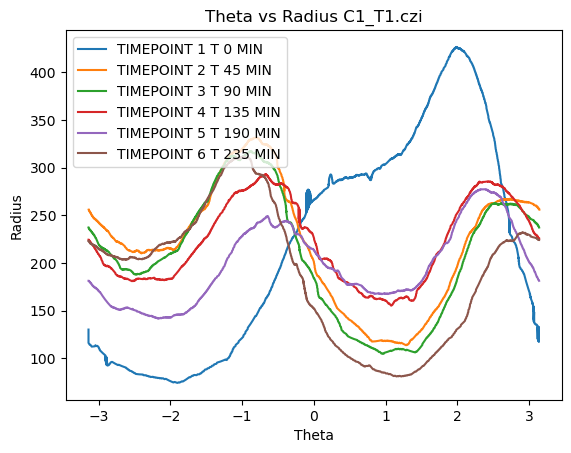

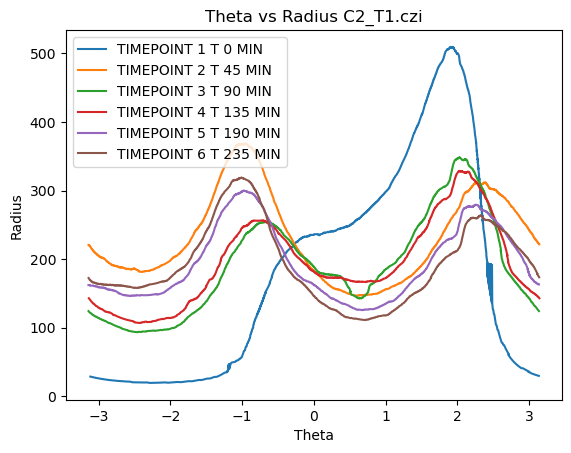

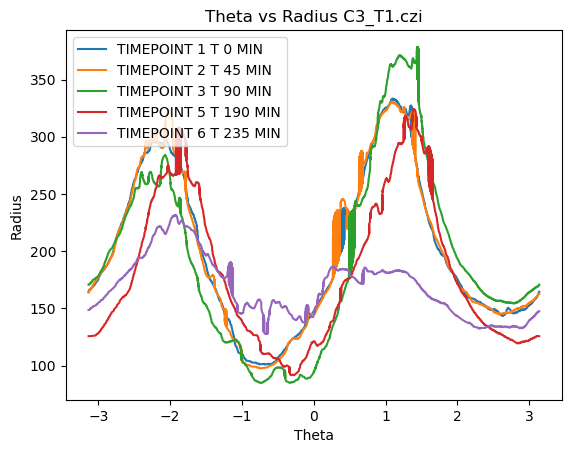

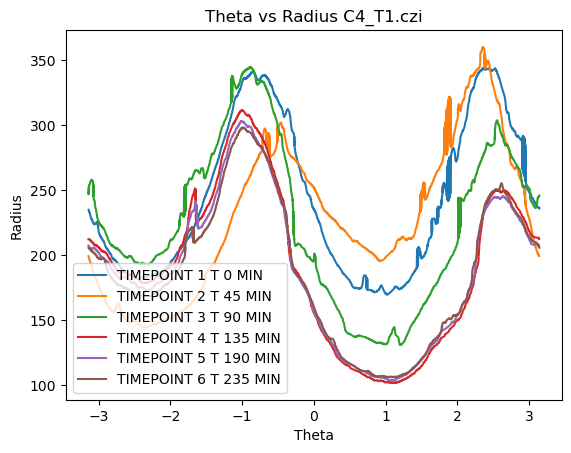

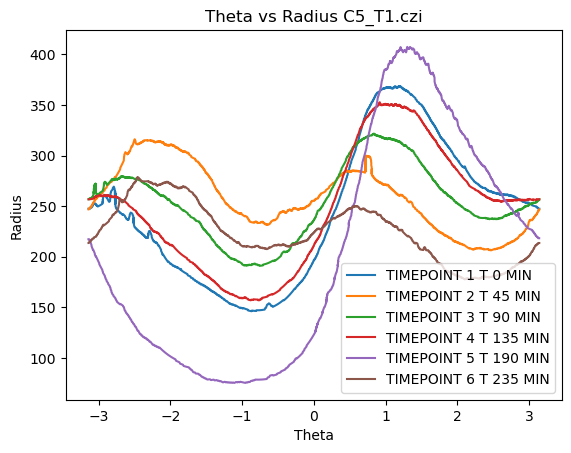

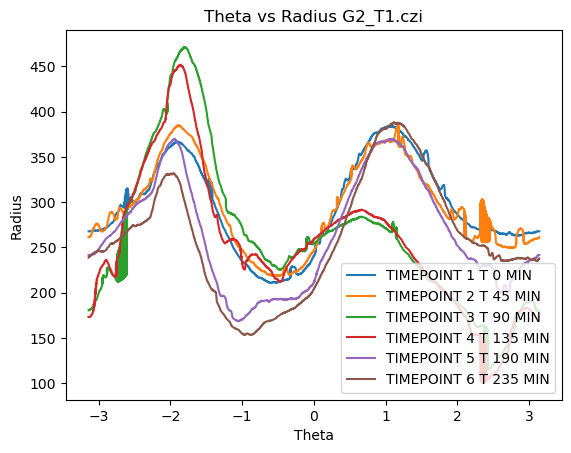

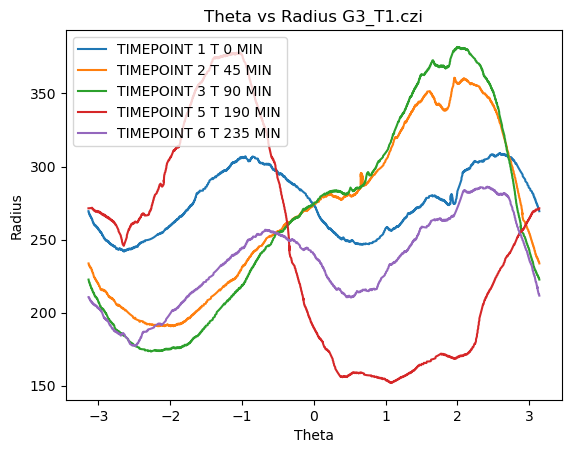

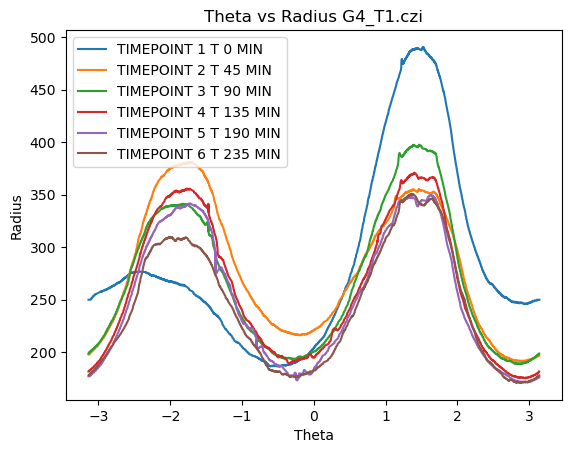

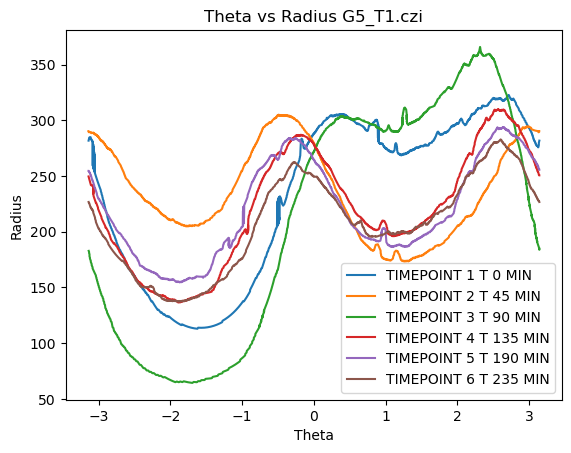

In [10]:
import numpy as np
import matplotlib.pyplot as plt

timepoint = 'TIMEPOINT 1 T 0 MIN'

# Get the sample keys in the specified timepoint
treatment_keys = imageDict.keys()

# Iterate over each sample
for treatment in imageDict.keys():
    for sample in imageDict[treatment][timepoint].keys():
        time = []
        # Get the numpy arrays for theta and radius
        for tp in imageDict[treatment].keys():
            for sp in imageDict[treatment][tp].keys():
                if sample[:2] == sp[:2]:
                    theta_array = np.load(f'theta_{sp}.npy')
                    radius_array = np.load(f'radius_{sp}.npy')
                    time.append(tp)
                    # Plot theta vs radius
                    plt.plot(theta_array, radius_array, label=sample)

        # Set the plot title and labels
        plt.title(f'Theta vs Radius {sample}')
        plt.legend(time)
        plt.xlabel('Theta')
        plt.ylabel('Radius')
        # Show the plot
        plt.show()  





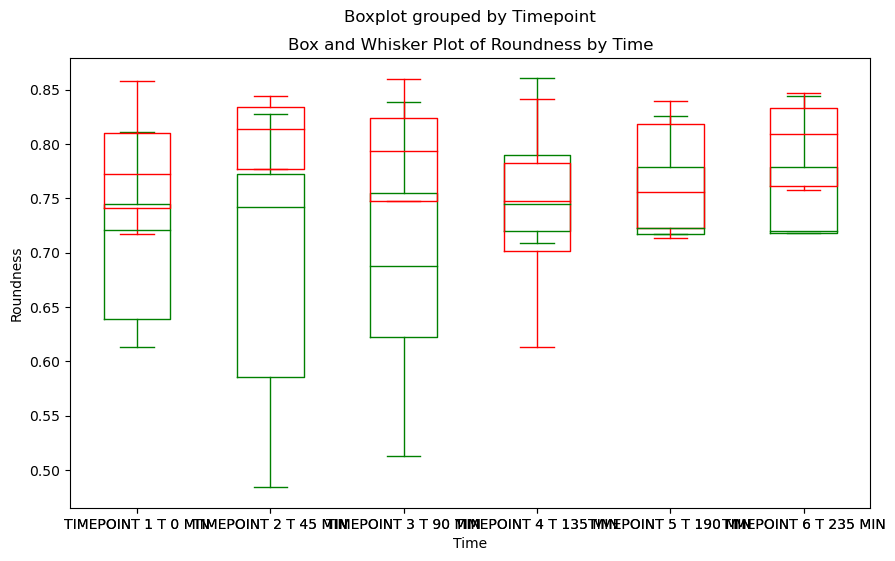

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('output.csv')

# Create a boxplot for each treatment
plt.figure(figsize=(10, 6))
df[df['Treatment'] == 'Control'].boxplot(column='Roundness', by='Timepoint', ax=plt.gca(), color ='green', grid=False, sym='')
df[df['Treatment'] == 'GSK'].boxplot(column='Roundness', by='Timepoint', ax=plt.gca(), color = 'red', grid=False, sym='')

# Set the plot title and labels
plt.title('Box and Whisker Plot of Roundness by Time')
plt.xlabel('Time')
plt.ylabel('Roundness')

# Show the plot
plt.show()


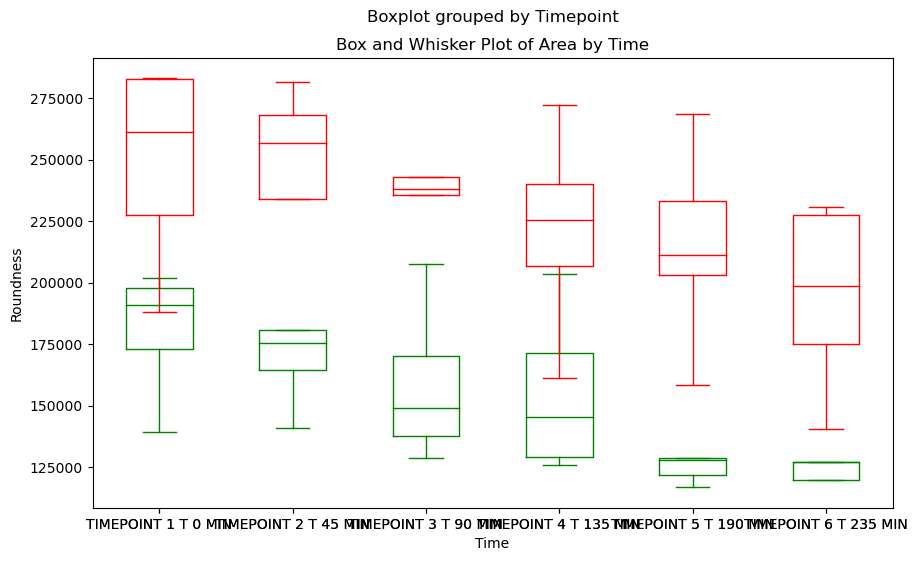

In [6]:
# Create a boxplot for each treatment
plt.figure(figsize=(10, 6))
df[df['Treatment'] == 'Control'].boxplot(column='Area', by='Timepoint', ax=plt.gca(), color ='green', grid=False, sym='')
df[df['Treatment'] == 'GSK'].boxplot(column='Area', by='Timepoint', ax=plt.gca(), color = 'red', grid=False, sym='')

# Set the plot title and labels
plt.title('Box and Whisker Plot of Area by Time')
plt.xlabel('Time')
plt.ylabel('Roundness')

# Show the plot
plt.show()


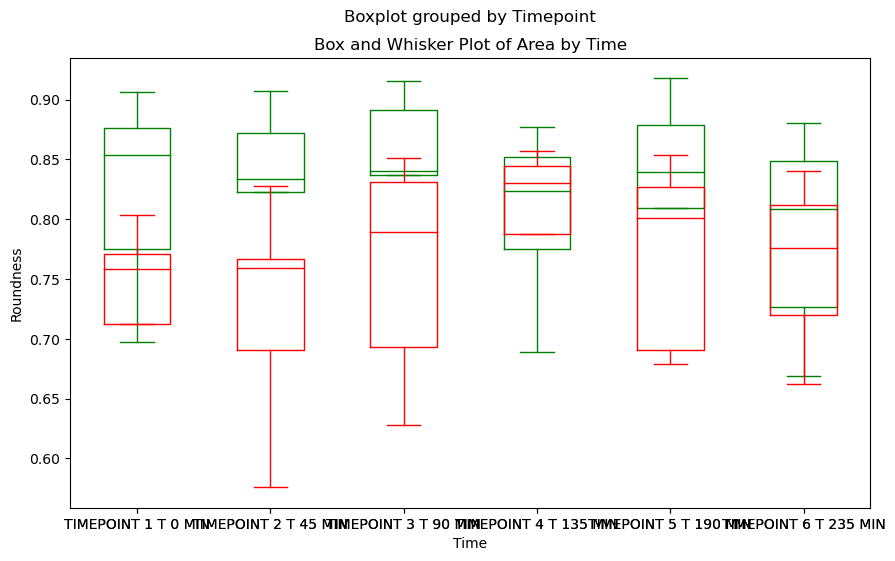

In [7]:
# Create a boxplot for each treatment
plt.figure(figsize=(10, 6))
df[df['Treatment'] == 'Control'].boxplot(column='Eccentricity', by='Timepoint', ax=plt.gca(), color ='green', grid=False, sym='')
df[df['Treatment'] == 'GSK'].boxplot(column='Eccentricity', by='Timepoint', ax=plt.gca(), color = 'red', grid=False, sym='')

# Set the plot title and labels
plt.title('Box and Whisker Plot of Area by Time')
plt.xlabel('Time')
plt.ylabel('Roundness')

# Show the plot
plt.show()